# PCA - Words
## Words as individuals

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df = df.drop(['#+', '#-', 'coefficient'], axis=1)
df

,principal component 1,principal component 2,idx,word,#
0,0.153179,14.693983,101,[CLS],40000.0
1,0.082347,3.135786,10166,wow,207.0
2,18.875050,5.667656,19387,rt,11690.0
3,9.847976,-9.752333,16099,porsche,2.0
4,6.103490,13.537622,5665,ill,60.0
...,...,...,...,...,...
14834,-1.755989,7.167114,22878,midday,1.0
14835,18.355342,-3.831184,26701,merritt,1.0
14836,-15.004258,-10.442618,9141,circulation,1.0
14837,4.811577,-10.297508,17411,oswald,1.0


### Plot words

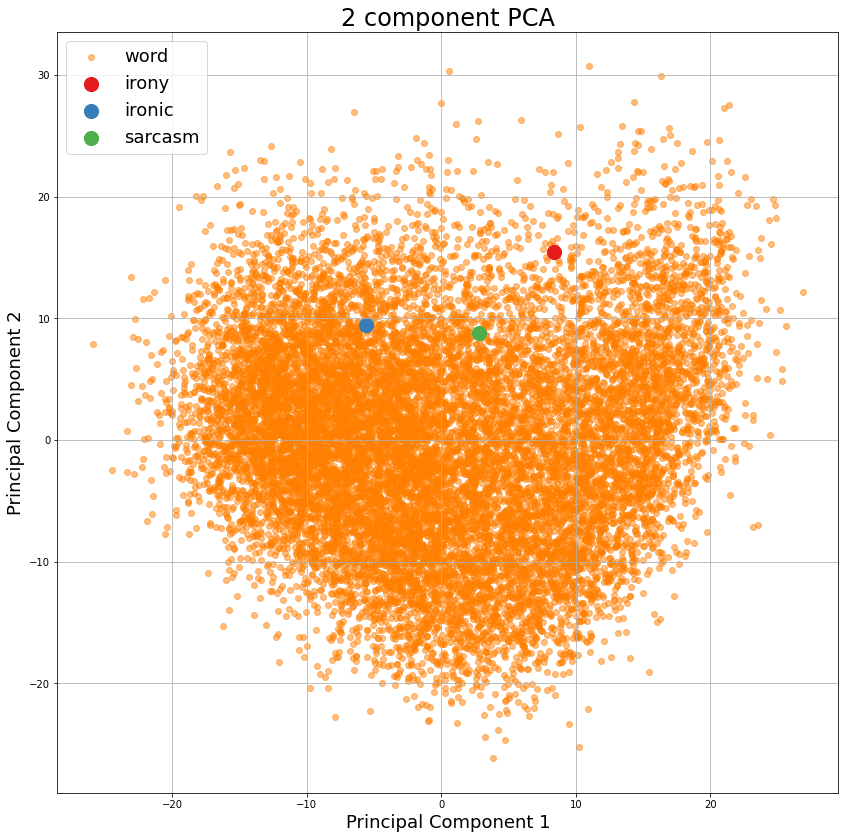

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
# Plot words
colors = get_cmap("Set1").colors
colors_iter = iter([colors[4], colors[0], colors[1], colors[2]])
ax.scatter(df["principal component 1"], df["principal component 2"], c=[next(colors_iter)], label='word', alpha=0.5)
# Plot hot words
for word in ['irony', 'ironic', 'sarcasm']:
    row = df[df['word'] == word]
    ax.scatter(row["principal component 1"], row["principal component 2"], c=[next(colors_iter)], label=word, s=200)
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

### k-nearest neighbors

In [3]:
def k_nearest_neighbors(df, k, x, y):
    out_df = []
    for row in df.values:
        row_x, row_y, *tail = row
        out_df.append([row_x] + [row_y] + tail + [(x - row_x)**2 + (y - row_y)**2])
    columns = list(df.columns)
    columns.append("distance")
    return pd.DataFrame(out_df, columns=columns).sort_values(by=['distance'], ascending=True).iloc[1:].head(k)

def get_position(word):
    row = df[df['word'] == word] 
    x, y = float(row['principal component 1']), float(row['principal component 2'])
    return x, y

#### "Irony"

In [4]:
x, y = get_position('irony')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
11443,8.293048,15.395373,15584,registry,1.0,0.008184
4517,8.427038,15.911202,28093,stat,4.0,0.228213
2798,7.808971,15.060692,14816,slides,15.0,0.460064
888,8.051331,16.069477,10975,pr,349.0,0.504566
2935,8.690122,14.768744,9932,ai,145.0,0.546034
596,7.888470,14.800180,7674,commons,6.0,0.640265
3350,7.548145,15.726577,20643,yahoo,87.0,0.765592
897,8.233547,16.332780,21688,superb,18.0,0.822979
10705,8.765379,14.542564,19906,sighs,1.0,0.952548
1810,7.675099,16.219968,4654,ex,156.0,1.101809


#### "Ironic"

In [5]:
x, y = get_position('ironic')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
6111,-5.536987,9.487067,15508,worries,3.0,0.001884
1553,-5.513447,9.566431,4423,expanded,3.0,0.011629
14574,-5.467844,9.460488,14541,splitting,1.0,0.013036
5237,-5.532557,9.731856,5930,column,28.0,0.064875
5726,-5.859696,9.492496,3513,rules,64.0,0.078322
5490,-5.809115,9.678442,11499,unaware,2.0,0.091212
14363,-5.639104,9.792282,7881,fellowship,1.0,0.100000
3074,-5.223839,9.554550,5164,string,5.0,0.132202
10198,-5.578795,9.894227,27023,purported,1.0,0.170248
1208,-5.329086,9.886624,3298,drive,94.0,0.227011


#### "Sarcasm"

In [6]:
x, y = get_position('sarcasm')
df_distances = k_nearest_neighbors(df, 10, x, y)
df_distances

,principal component 1,principal component 2,idx,word,#,distance
3974,2.922417,9.004962,17203,pathetic,11.0,0.044052
465,3.017816,8.939444,3937,basic,36.0,0.053486
9100,3.009615,8.576750,26380,delightful,6.0,0.097244
4972,2.957770,8.513542,14969,blunt,7.0,0.115178
1029,2.988493,8.512876,9765,est,47.0,0.125117
10706,3.121718,9.113082,28462,mouthful,1.0,0.176429
532,3.102920,9.137454,4636,fund,40.0,0.180109
9389,2.848948,8.391737,26035,stitch,3.0,0.186805
11395,2.347414,8.610426,6957,venture,8.0,0.266656
7922,3.354723,8.655392,19240,metaphor,10.0,0.316015
